In [3]:
import os
import pandas as pd
import numpy as np
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
import urllib
import os
from PIL import Image
import requests
from io import BytesIO
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input

df=pd.read_csv("MovieGenre.csv")
df.head()




Using TensorFlow backend.


,imdbId,Imdb Link,Title,IMDB Score,Genre,Poster
0,114709,http://www.imdb.com/title/tt114709,Toy Story (1995),8.3,Animation|Adventure|Comedy,https://images-na.ssl-images-amazon.com/images...
1,113497,http://www.imdb.com/title/tt113497,Jumanji (1995),6.9,Action|Adventure|Family,https://images-na.ssl-images-amazon.com/images...
2,113228,http://www.imdb.com/title/tt113228,Grumpier Old Men (1995),6.6,Comedy|Romance,https://images-na.ssl-images-amazon.com/images...
3,114885,http://www.imdb.com/title/tt114885,Waiting to Exhale (1995),5.7,Comedy|Drama|Romance,https://images-na.ssl-images-amazon.com/images...
4,113041,http://www.imdb.com/title/tt113041,Father of the Bride Part II (1995),5.9,Comedy|Family|Romance,https://images-na.ssl-images-amazon.com/images...


In [ ]:
#ABANDON! ABANDON!
#YOU CAN JUST LOAD VGGNET (WOW);

#Implement VGG Net model
# import keras
# from keras.models import Sequential
# from keras.layers import Dense, Activation, Dropout, Flatten
# from keras.layers import Conv2D
# from keras.layers import MaxPooling2D

# input_shape = (224, 224, 3)

# VGGNET = Sequential([
# Conv2D(64, (3, 3), input_shape=input_shape, padding=’same’, activation=’relu’),
# Conv2D(64, (3, 3), activation=’relu’, padding=’same’),
# MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
# Conv2D(128, (3, 3), activation=’relu’, padding=’same’),
# Conv2D(128, (3, 3), activation=’relu’, padding=’same’,),
# MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
# Conv2D(256, (3, 3), activation=’relu’, padding=’same’,),
# Conv2D(256, (3, 3), activation=’relu’, padding=’same’,),
# Conv2D(256, (3, 3), activation=’relu’, padding=’same’,),
# MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
# Conv2D(512, (3, 3), activation=’relu’, padding=’same’,),
# Conv2D(512, (3, 3), activation=’relu’, padding=’same’,),
# Conv2D(512, (3, 3), activation=’relu’, padding=’same’,),
# MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
# Conv2D(512, (3, 3), activation=’relu’, padding=’same’,),
# Conv2D(512, (3, 3), activation=’relu’, padding=’same’,),
# Conv2D(512, (3, 3), activation=’relu’, padding=’same’,),
# MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
# Flatten(),
#]
# VGGNET.summary()


In [4]:
#Remove last layet of VGGnet
model = VGG16(weights='imagenet', include_top=False)
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
bloc

In [124]:
import os
import pandas as pd
import numpy as np
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
import urllib
import os
from PIL import Image
import requests
from io import BytesIO
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input

df=pd.read_csv("MovieGenre.csv")
df.head()
dim=(224,224)
vgg16_feature_list = []
model = VGG16(weights='imagenet', include_top=False)
model.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

In [139]:

#df=df.iloc[0:500,:]
df['features']=None

n=len(df.index)

for index,row in df.iterrows():
    try:
        url=row['Poster']
        genre=row['Genre'].split("|")[0]
        response=requests.get(url)
        img = image.load_img(BytesIO(response.content), target_size=dim, color_mode='rgb')
        img_numpy = image.img_to_array(img)
        img_data = np.expand_dims(img_numpy, axis=0)
        img_data = preprocess_input(img_data)
        
        vgg16_feature = model.predict(img_data)
        vgg16_feature_np = np.array(vgg16_feature)
        vgg16_feature_list.append(vgg16_feature_np.flatten())
        
        features=vgg16_feature_np.flatten()
   
        df.at[index,'features'] = features
      
    except IOError:
        pass
    
    except AttributeError:
        pass

    if index%200==0:
        print(float(index/n)*100,"% done")
 
    

0.0 % done
0.8 % done
1.6 % done


KeyboardInterrupt: 

In [126]:


x_train=list()

y_train=list()
for index,row in df.iterrows():
    
    try:
        x_train.append(row['features'].astype('float'))
        y_train.append(row['Genre'].split("|")[0])

    except AttributeError:
        pass
    
y_train=np.asarray(y_train)

x_train=np.asarray(x_train)


###check if shape/types are okay

#print(x_train.shape,y_train.shape)

#print(x_train[1].shape)

genre_names=list(set(y_train))

In [101]:
len(genre_names)

15

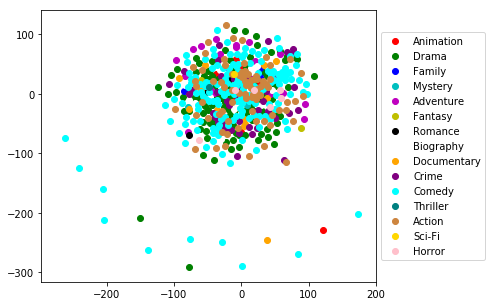

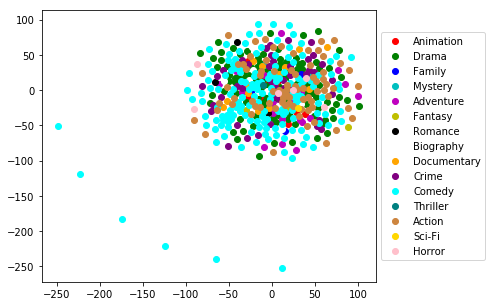

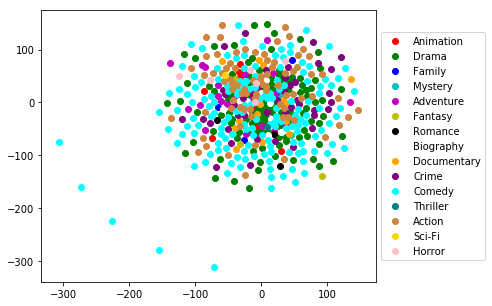

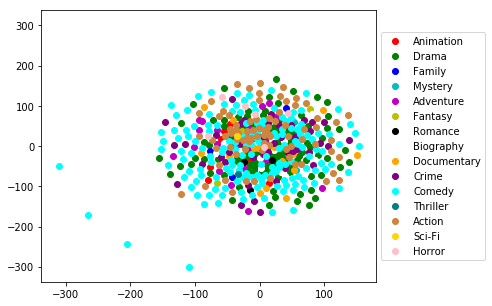

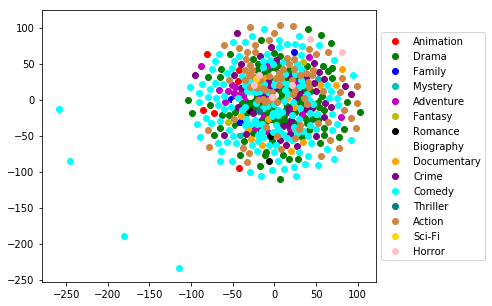

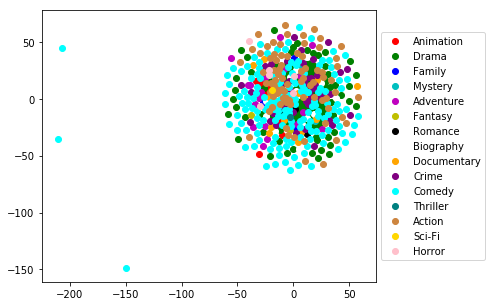

In [127]:

from sklearn.manifold import TSNE
for perplexity in [5,10,15,20,25,30]:
    tsne = TSNE(n_components=2, random_state=0,perplexity=perplexity)
    x_train_2d = tsne.fit_transform(x_train)
    target_ids = range(len(genre_names))

    from matplotlib import pyplot as plt
    %matplotlib inline

    plt.figure(figsize=(6, 5))
    colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'w', 'orange', 'purple','cyan','teal','peru','gold','pink'
    for i, c, label in zip(target_ids, colors, genre_names):
            plt.scatter(x_train_2d[y_train == genre_names[i], 0], x_train_2d[y_train == genre_names[i], 1], c=c, label=label)

    plt.legend(loc='center left',bbox_to_anchor=(1, 0.5))
    plt.show()
